In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [0]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

learning_rate = 0.1
list_X = []
list_Y_SGD = []
for i in range(5):
  learning_rate += 0.1
  opt = keras.optimizers.SGD(learning_rate)
  model.compile(optimizer = opt, 
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  h = model.fit(train_images, train_labels,
	            validation_data=(test_images, test_labels))
  list_X.append(learning_rate)
  list_Y_SGD.append(h.history['acc'])


Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 10s 166us/sample - loss: 0.5339 - acc: 0.8022 - val_loss: 0.4285 - val_acc: 0.8438
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 10s 171us/sample - loss: 0.4270 - acc: 0.8428 - val_loss: 0.4379 - val_acc: 0.8300
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 10s 162us/sample - loss: 0.4170 - acc: 0.8482 - val_loss: 0.4197 - val_acc: 0.8460
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 10s 173us/sample - loss: 0.4119 - acc: 0.8513 - val_loss: 0.4802 - val_acc: 0.8281
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 10s 173us/sample - loss: 0.4302 - acc: 0.8444 - val_loss: 0.4467 - val_acc: 0.8383


Text(0, 0.5, 'Accuracy')

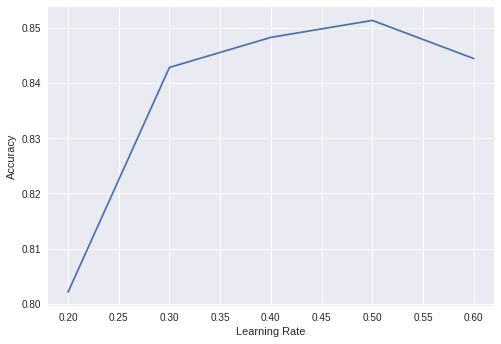

In [0]:
import matplotlib.pyplot as plt
plt.plot(list_X, list_Y_SGD,label = 'SGD')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')